# Chest X-Ray Images for Pneumonia

## Table of Contents

1. Introduction
2. Importing
3. Exploring the Disease Labels
4. Image Manipulation

### 1. Introduction 

### 2. Importing

In [39]:
import numpy as np 
import pandas as pd 
import random
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
plt.rc('image', cmap='gray')
import time
from datetime import timedelta
import math
import cv2


In [2]:
categories = ['NORMAL', 'PNEUMONIA']
datasets = ['train', 'test']

In [8]:
widths = []
heights = []

for sets in datasets:
    for cat in categories:
        filelist = glob.glob('/Users/kasey.larsen/Documents/GitHub/Chest-X-Ray-Images-Pneumonia-/chest_xray/' + sets + '/' + cat + '/*.jpeg')
        widths.extend([Image.open(fname).size[0] for fname in filelist])
        heights.extend([Image.open(fname).size[1] for fname in filelist])

images_size = pd.DataFrame({"widths": widths, "heights": heights})
        
print("Average image width: ", round(images_size["widths"].mean(), 2))
print("Average image height: ", round(images_size["heights"].mean(), 2))


Average image width:  1327.83
Average image height:  970.6


In [9]:
im_width = int(images_size["widths"].mean()/10)
im_height = int(images_size["heights"].mean()/10)
print("image width: " , str(im_width))
print("image height: " , str(im_height))

image width:  132
image height:  97


In [27]:
X = []
y_names = []

for sets in datasets:
    for cat in categories:
        filelist = glob.glob('/Users/kasey.larsen/Documents/GitHub/Chest-X-Ray-Images-Pneumonia-/chest_xray/' + sets + '/' + cat + '/*.jpeg')
        y_names.extend([cat for _ in filelist])
        X.extend([np.array(Image.open(fname).convert('L').resize((im_width, im_height))) for fname in filelist])
#
X_array = np.stack(X, axis=0)

In [13]:
X_array.shape

(5840, 97, 132)

### 3. Exploring the Disease Labels

In [22]:
normal_count = y_names.count('NORMAL')
pneumonia_count = y_names.count('PNEUMONIA')

In [25]:
print("Percentage of Dataset:")
print("- Normal:\t\t{}".format(normal_count/len(y_names)))
print("- Pneumonia:\t\t{}".format(pneumonia_count/len(y_names)))

Percentage of Dataset:
- Normal:		0.2696917808219178
- Pneumonia:		0.7303082191780822


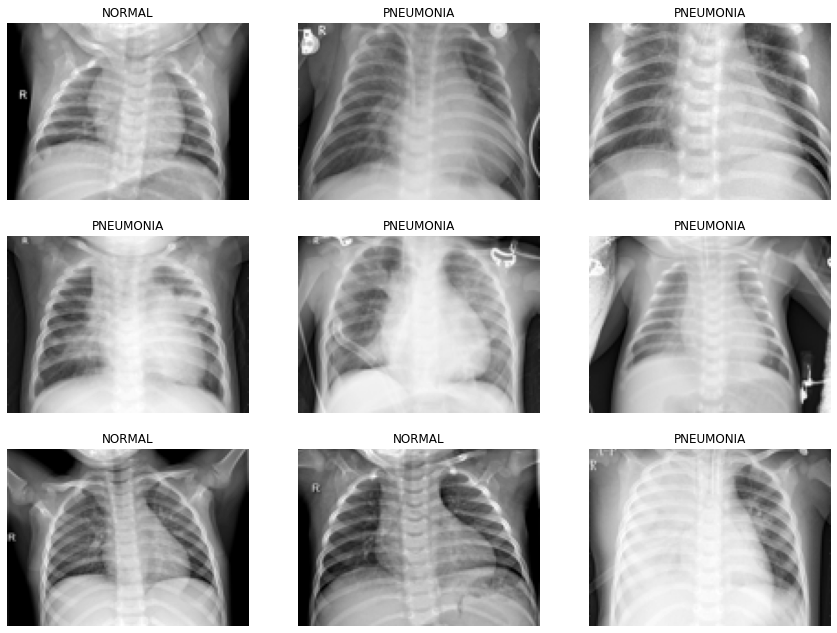

In [33]:
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(4, 4)
#
for line in range(0, 3):
    for row in range(0, 3):
        num_image = random.randint(0, X_array.shape[0])
        ax = fig.add_subplot(gs[line, row])
        ax.axis('off');
        ax.set_title(y_names[num_image])
        ax.imshow(X_array[num_image]);

### 4. Image Manipulation

In [41]:
image = X_array[1]

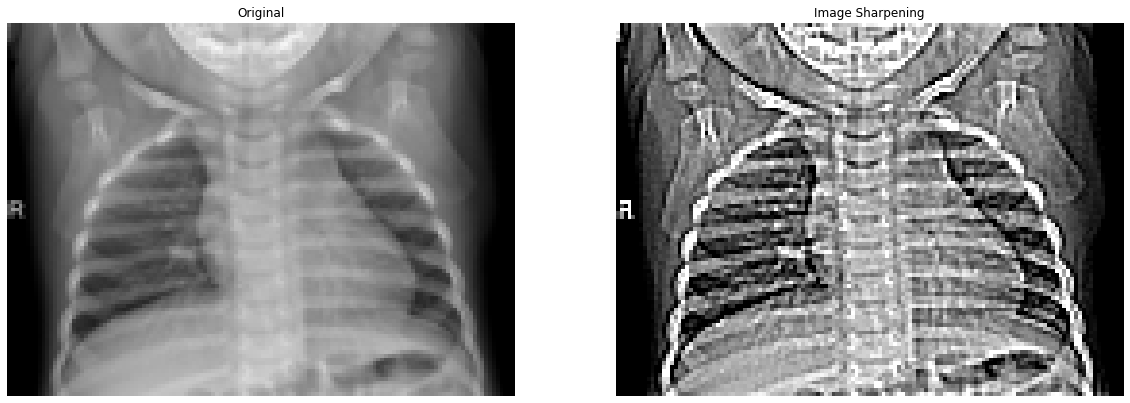

In [42]:
#Sharpening
picture_1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.axis('off')
plt.imshow(picture_1)


kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])


sharpened = cv2.filter2D(picture_1, -1, kernel_sharpening)


plt.subplot(1, 2, 2)
plt.title('Image Sharpening')
plt.axis('off')
plt.imshow(sharpened)

plt.show()

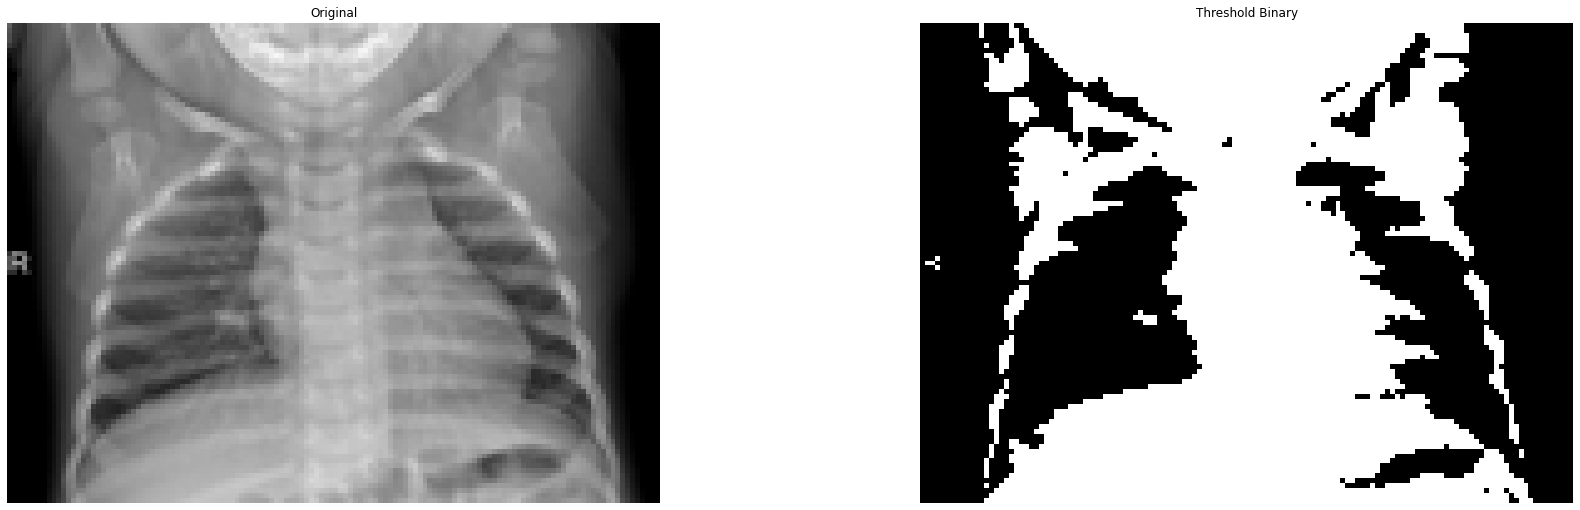

In [43]:
#Threshold Binary
picture_1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title('Original')
plt.axis('off')
plt.imshow(picture_1)

ret,thresh1 = cv2.threshold(picture_1, 127, 255, cv2.THRESH_BINARY)

plt.subplot(3, 2, 2)
plt.title('Threshold Binary')
plt.axis('off')
plt.imshow(thresh1)


# It's good practice to blur images as it removes noise
picture_1 = cv2.GaussianBlur(picture_1, (3, 3), 0)

plt.show()

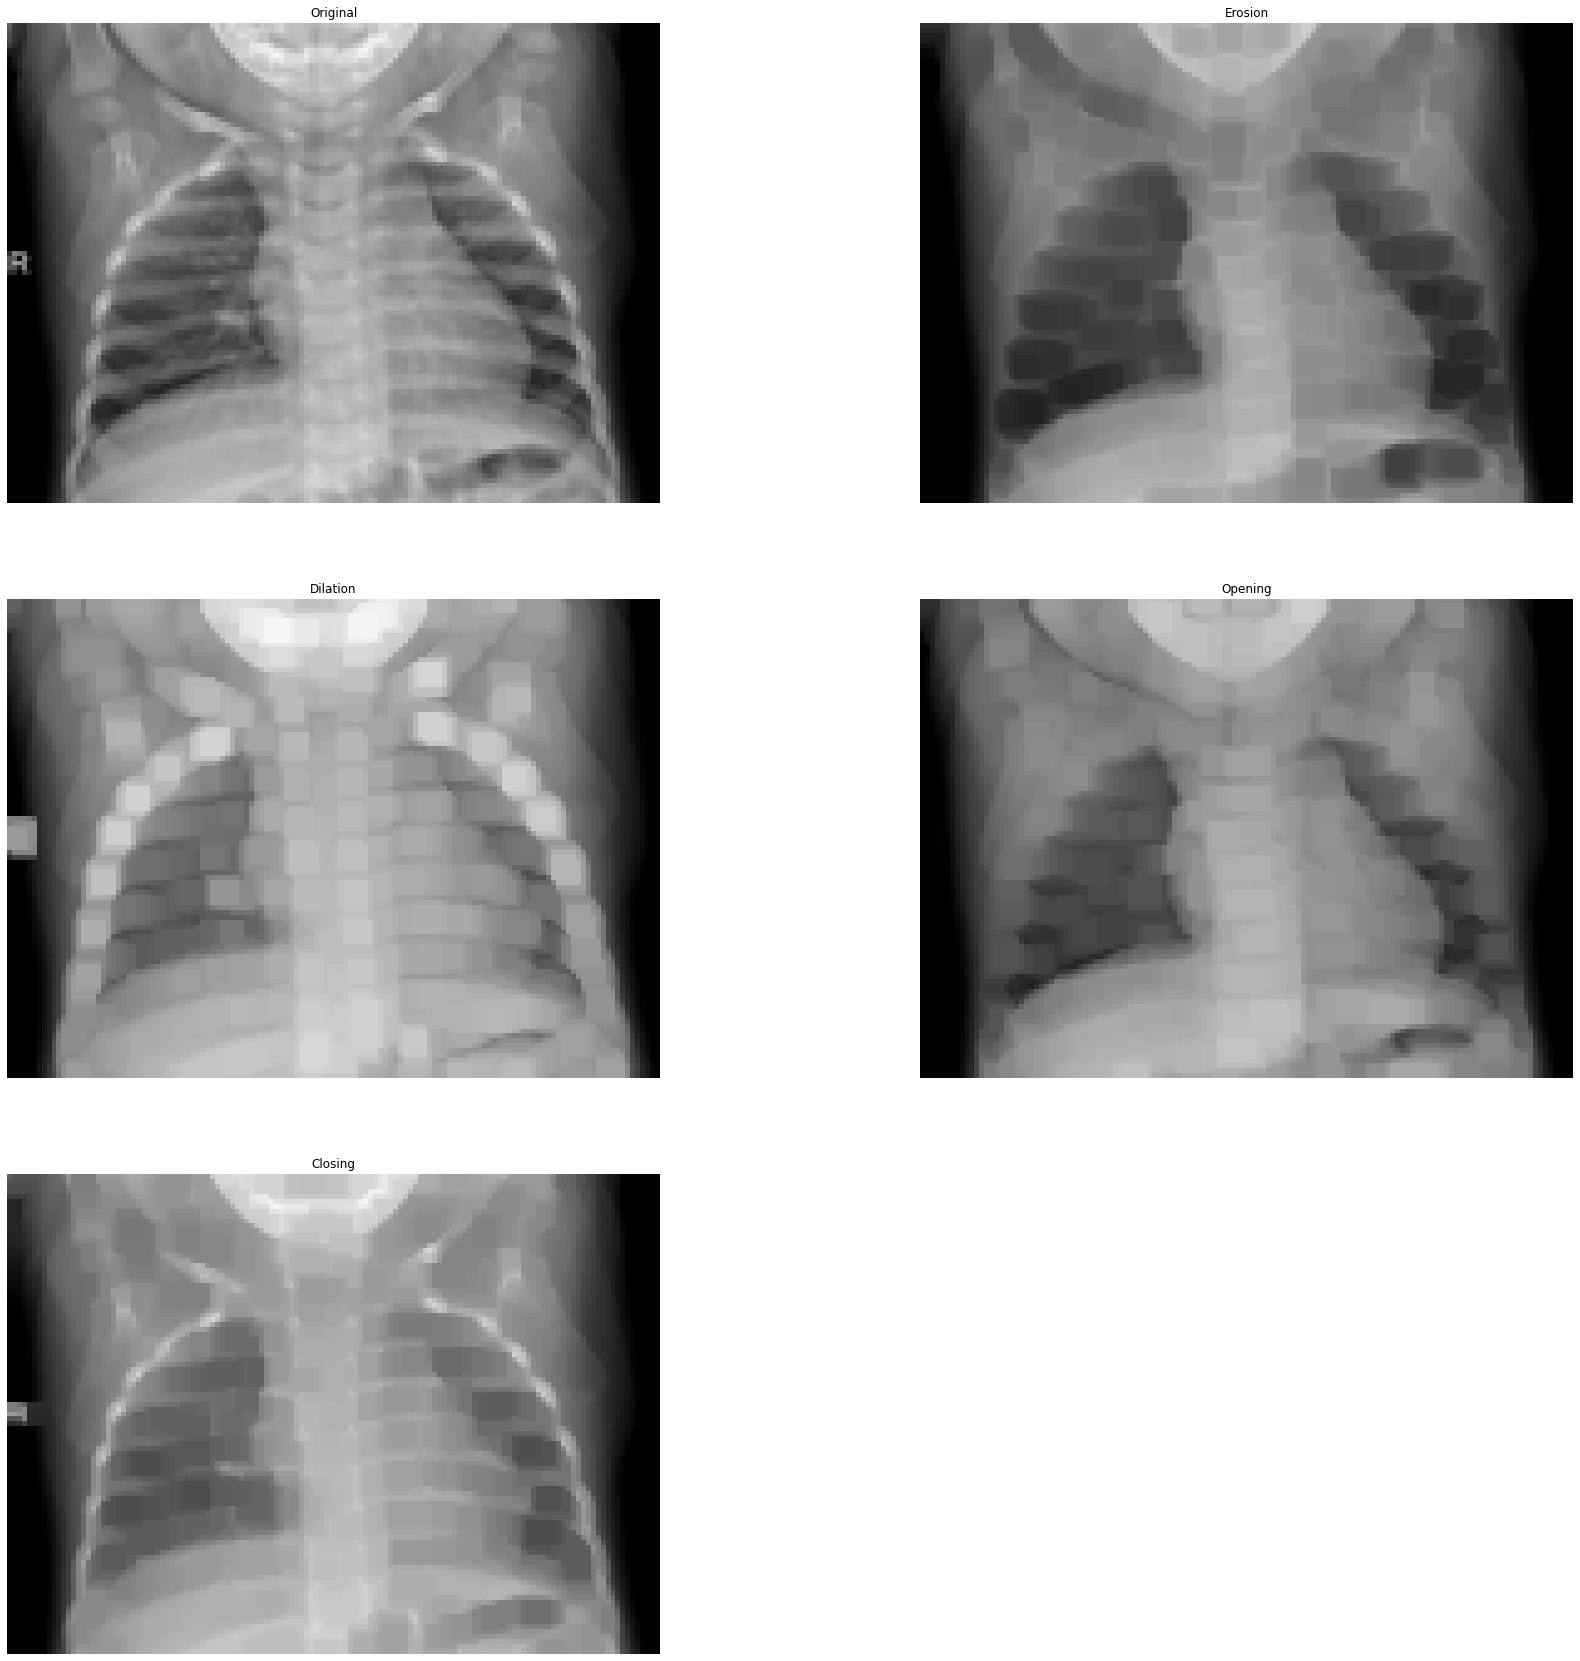

In [44]:
picture_1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title('Original')
plt.axis('off')
plt.imshow(picture_1)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# Now we erode
erosion = cv2.erode(picture_1, kernel, iterations = 1)

plt.subplot(3, 2, 2)
plt.title('Erosion')
plt.axis('off')
plt.imshow(erosion)

# Dilation
dilation = cv2.dilate(picture_1, kernel, iterations = 1)
plt.subplot(3, 2, 3)
plt.title('Dilation')
plt.axis('off')
plt.imshow(dilation)


# Opening - Good for removing noise
opening = cv2.morphologyEx(picture_1, cv2.MORPH_OPEN, kernel)
plt.subplot(3, 2, 4)
plt.title('Opening')
plt.axis('off')
plt.imshow(opening)


# Closing - Good for removing noise
closing = cv2.morphologyEx(picture_1, cv2.MORPH_CLOSE, kernel)
plt.subplot(3, 2, 5)
plt.title('Closing')
plt.axis('off')
plt.imshow(closing)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/kasey.larsen/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cm.py:317: RuntimeWarning: invalid value encountered in multiply
  xx = (xx * 255).astype(np.uint8)


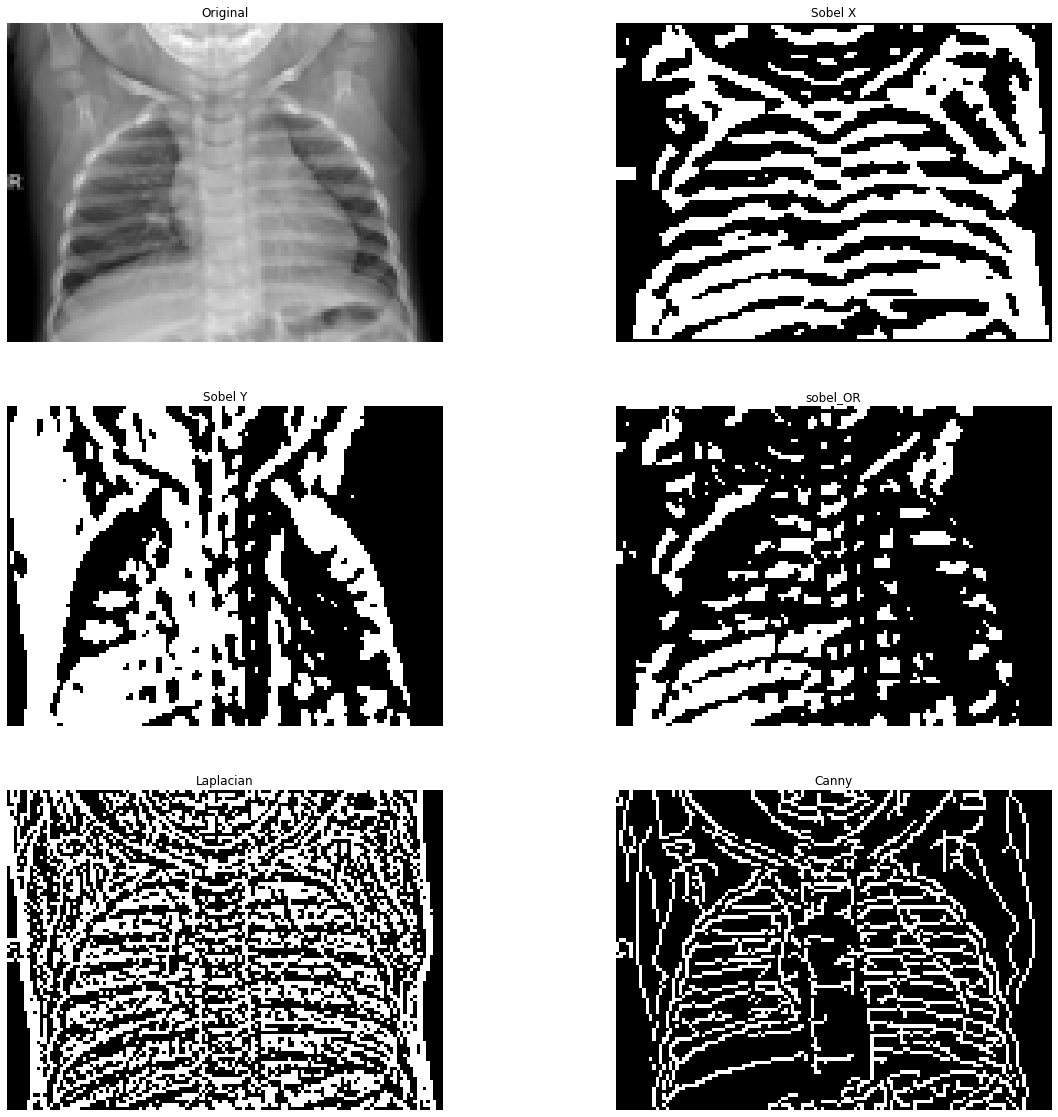

In [45]:
picture_1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width,_ = picture_1.shape

# Extract Sobel Edges
sobel_x = cv2.Sobel(picture_1, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(picture_1, cv2.CV_64F, 1, 0, ksize=5)

plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
plt.title('Original')
plt.axis('off')
plt.imshow(image)

plt.subplot(3, 2, 2)
plt.title('Sobel X')
plt.axis('off')
plt.imshow(sobel_x)

plt.subplot(3, 2, 3)
plt.title('Sobel Y')
plt.axis('off')
plt.imshow(sobel_y)

sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)

plt.subplot(3, 2, 4)
plt.title('sobel_OR')
plt.axis('off')
plt.imshow(sobel_OR)

laplacian = cv2.Laplacian(picture_1, cv2.CV_64F)

plt.subplot(3, 2, 5)
plt.title('Laplacian')
plt.axis('off')
plt.imshow(laplacian)

canny = cv2.Canny(picture_1, 50, 120)

plt.subplot(3, 2, 6)
plt.title('Canny')
plt.axis('off')
plt.imshow(canny)

Number of Contours found = 23


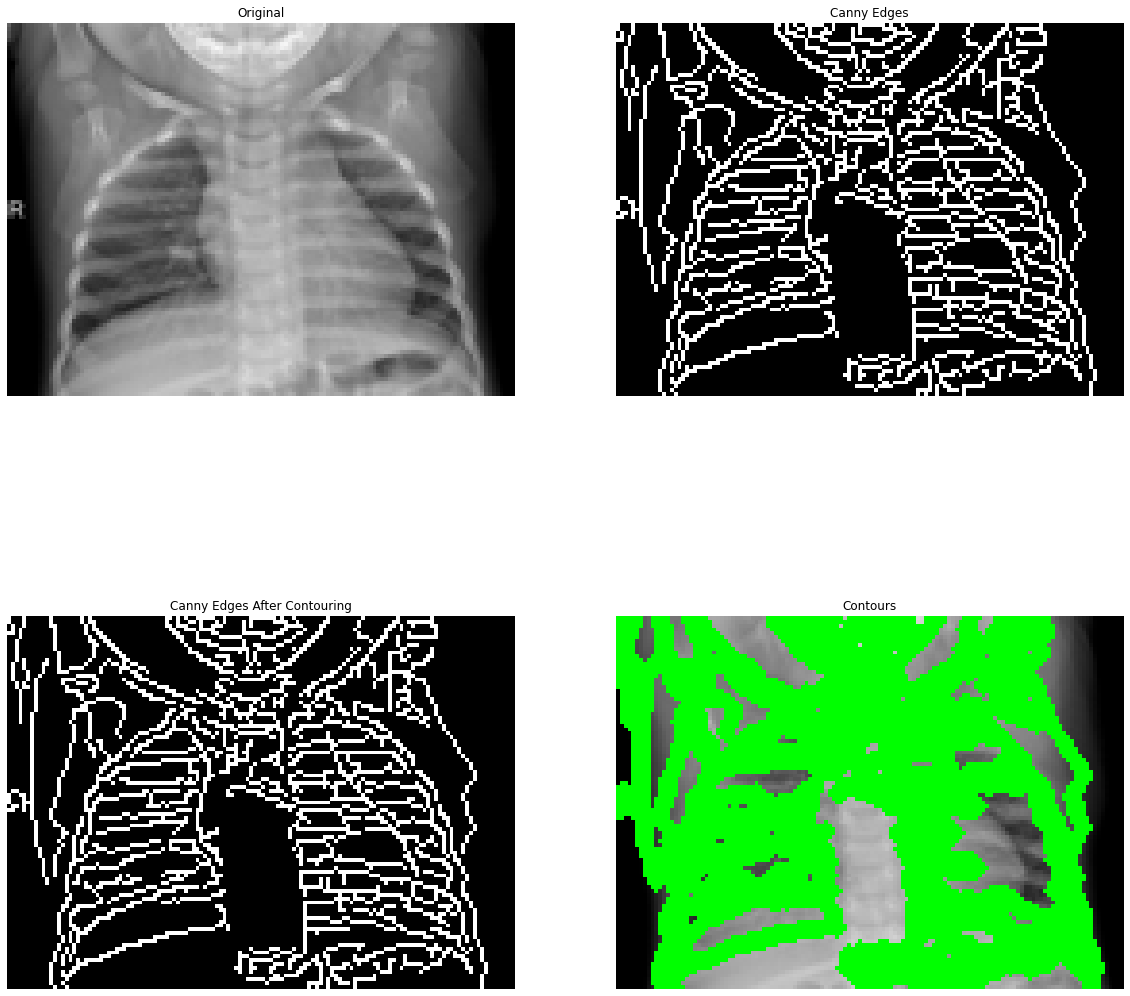

In [46]:
picture_1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title('Original')
plt.axis('off')
plt.imshow(picture_1)


# Grayscale
gray = cv2.cvtColor(picture_1,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)

plt.subplot(2, 2, 2)
plt.title('Canny Edges')
plt.axis('off')
plt.imshow(edged)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

plt.subplot(2, 2, 3)
plt.title('Canny Edges After Contouring')
plt.axis('off')
plt.imshow(edged)

print('Number of Contours found = ' + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(picture_1, contours, -1, (0,255,0), 3)

plt.subplot(2, 2, 4)
plt.title('Contours')
plt.axis('off')
plt.imshow(picture_1)